# Zero order optimization. Accelerated gradient methods 

## Problem features 

- Objective function is defined in discrete space
- Gradient can not be computed

## Examples

- All problems on decision making and selection of element from finite set
- Tuning hyper parameters in machine learning models
- Scalarization parameters in multicriteria optimization

## Methods for discrete problems

- Simulated annealing
- Genetic algorithms

### Simulated annealing method

- The idea is taken fromthe metallurgy where the crystallization process is performed with the gradually decreasing of the temperature
- Main steps:
    - Initialize starting point and parameters
    - In every iteration you update parameters ith some probability which depends on so-called temparature $T$
    
    $$ P(x_k \to x^*) = \begin{cases} 1 & f(x^*) < f(x_k) \\ \exp\left(- \frac{f(x^*) - f(x_k)}{T / k}\right) & f(x^*) > f(x_k) \end{cases} $$
    
    - Parameters tuning is based on heuristics!

**Q:** what do we get if $T = 0$?

In [106]:
import numpy as np

def sim_anneal(f, x0, T0, num_iter, alpha):
    x = x0
    conv = [x]
    n = x.shape[0]
    cur_f = f(x)
    f_best = cur_f
    x_best = x.copy()
    T = T0
    for i in range(num_iter):
        idx = np.random.randint(0, n)
        x_new = x.copy()
        x_new[idx] = -x_new[idx]
        f_new = f(x_new)
        if f_new < cur_f:
            x = x_new.copy()
            cur_f = f_new
            conv.append(x)
        if f_new > cur_f:
#             print(np.exp( - (f_new - cur_f) / (T / (i+1))))
            if np.exp( - (f_new - cur_f) / T) >= np.random.rand(1):
                x = x_new.copy()
                cur_f = f_new
                conv.append(x)
        if f_new < f_best:
            f_best = f_new
            x_best = x.copy()
#         print(f(x))
        T = alpha * T
#         T = T0 / (i+1)
    return x_best, f_best, conv    

In [107]:
n = 100
W = np.random.rand(n, n)
W = W + W.T

In [108]:
def f(x):
    return x @ (W @ x)

In [109]:
x0 = np.ones(n)
num_iter = 500
T = 10000
alpha = 0.9

In [114]:
x_best, f_best, conv = sim_anneal(f, x0, T, num_iter, alpha=0.7)
print(f_best)
print(np.sum(x_best == 1), np.sum(x_best == -1))

-442.85511025124214
49 51


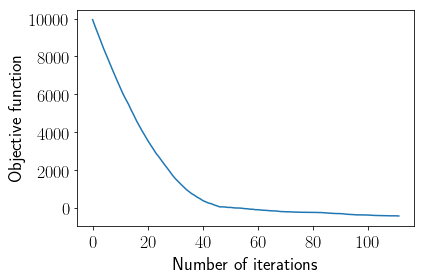

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("text", usetex=True)

plt.plot([f(x) for x in conv])
plt.xlabel("Number of iterations", fontsize=18)
plt.ylabel("Objective function", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# plt.yscale("log")
plt.tight_layout()


### Simulated annealing summary

- Very simple method
- Can be applicable to many kinds of problems
    - Update procedure
    - Decreasing temperature strategy
    - Trade-off between number of iterations and starting temperature

## Genetic algorithm

- Evolution inspired method
- Main steps
    - Initialize candidate set
    - Compute objective function in these candidates
    - Select $k$ best candidates to be a solution
    - Compose from them a new set of candidates through
        - mutation
        - crossover

### Crossover

<img src="./crossover.png" width=500>

### Mutation

- Random change of random element in current point
- Possible options
    - $0 \to 1$ and vice versa
    - add random noise
    - any other heuristics

### [Nevergrad](https://github.com/facebookresearch/nevergrad)

- Facebook released framework for zero-order optimization methods
- You can find there a lot of methods for gradient-free optimization
- For example, you can find there [Compact Genetic Algorithm](https://pdfs.semanticscholar.org/4b0b/5733894ffc0b2968ddaab15d61751b87847a.pdf)


In [116]:
import nevergrad as ng
print(list(sorted(ng.optimizers.registry.keys())))

['ASCMA2PDEthird', 'ASCMADEQRthird', 'ASCMADEthird', 'AlmostRotationInvariantDE', 'BO', 'CM', 'CMA', 'CMandAS', 'CMandAS2', 'CMandAS3', 'CauchyLHSSearch', 'CauchyOnePlusOne', 'CauchyScrHammersleySearch', 'Cobyla', 'DE', 'DiagonalCMA', 'DiscreteOnePlusOne', 'DoubleFastGADiscreteOnePlusOne', 'EDA', 'ES', 'FCMA', 'HaltonSearch', 'HaltonSearchPlusMiddlePoint', 'HammersleySearch', 'HammersleySearchPlusMiddlePoint', 'LHSSearch', 'LargeHaltonSearch', 'LhsDE', 'MEDA', 'MPCEDA', 'MetaRecentering', 'MixES', 'MultiCMA', 'MultiScaleCMA', 'MutDE', 'NGO', 'NaiveIsoEMNA', 'NaiveTBPSA', 'NelderMead', 'NoisyBandit', 'NoisyDE', 'NoisyDiscreteOnePlusOne', 'NoisyOnePlusOne', 'ORandomSearch', 'OScrHammersleySearch', 'OnePlusOne', 'OptimisticDiscreteOnePlusOne', 'OptimisticNoisyOnePlusOne', 'PBIL', 'PCEDA', 'PSO', 'ParaPortfolio', 'Portfolio', 'Powell', 'QORandomSearch', 'QOScrHammersleySearch', 'QrDE', 'RCobyla', 'RPowell', 'RSQP', 'RandomSearch', 'RandomSearchPlusMiddlePoint', 'RealSpacePSO', 'RecES', 'Re

In [117]:
conv_cga = []
def obj(*x):
    y = np.array(x).squeeze()
    conv_cga.append(y)
#     print(y.shape)
    return y @ (W @ y)

In [118]:
var = [ng.p.Choice([-1, 1]) for i in range(n)]
inst = ng.p.Instrumentation(*var)
opt = ng.optimizers.cGA(inst, budget=100)
x_sol = opt.minimize(obj)
print(x_sol.args, f(np.array(x_sol.args)))

(-1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, 1, -1, 1, -1, -1, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1) 2500.1542534424834


-97.21583986342864


Text(0.5, 0, 'Number of iterations')

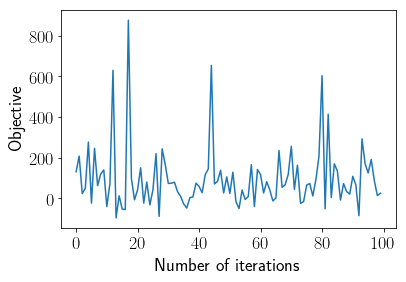

In [119]:
def obj_plot(x):
    return x @ (W @ x)

f_conv = [obj_plot(x) for x in conv_cga]
print(np.min(np.array(f_conv)))
plt.plot(f_conv)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel("Objective", fontsize=18)
plt.xlabel("Number of iterations", fontsize=18)

### Summary

- Construct genetic algorithm that solves particular problem very well is an art!
- Many strategies to crossover and mutations
- No practically important theory
- There exists standard implementations

### Particle swarm optimization: idea

<img src="./pso.gif">

<img src="./pso_alg.png">

## Intro to accelerated methods

## Reminder about gradient descent

- Easy to implement
- It converges at least to stationary point
- Recent [paper](https://arxiv.org/pdf/1602.04915.pdf) shows that GD converges to a local minimizer **almost sure** with random initialization
- Linear convergence in strongly convex case
- $O(1/k)$ convergence in convex $L$-smooth case
- It strongly depends on the condition number of $f''(x)$, random initial guess vector can help

## Can we do better?

- Heavy-ball method
- Nesterov accelerated gradient method

## Heavy-ball method (Polyak, 1964)

$$
x_{k+1} = x_k - \alpha_k f'(x_k) + {\color{red}{\beta_k(x_k - x_{k-1})}}
$$

- Two-step non-monotone method
- Discretization of the ODE with friction term

$$
\ddot x + b \dot x + a f'(x) = 0
$$

- CG is special case of this form

### Heavy ball method visualization
Picture is from [this](https://www.princeton.edu/~yc5/ele538_optimization/lectures/accelerated_gradient.pdf) presentation
<img src="./heavy_ball.png" width=600 align="center">

### Convergence: $\mu$-strongly convex
- Rewrite method as 
\begin{equation*}
\begin{split} 
\begin{bmatrix} x_{k+1}\\ x_k \end{bmatrix}
 = \begin{bmatrix} (1 + \beta_k)I & -\beta_k I \\ I & 0 \end{bmatrix}
 \begin{bmatrix} x_k\\ x_{k-1} \end{bmatrix}
 +
 \begin{bmatrix} -\alpha_k f'(x_k)\\ 0 \end{bmatrix}
\end{split}
\end{equation*}
-  Use theorem from calculus
\begin{equation*}
\begin{split}
\begin{bmatrix} x_{k+1} - x^*\\ x_k - x^* \end{bmatrix}
 = 
 \underbrace{ \begin{bmatrix} (1 + \beta_k)I - \alpha_k \int_0^1 f''(x(\tau))d\tau & -\beta_k I\\ I & 0 \end{bmatrix}}_{=A_t}
 \begin{bmatrix} x_k - x^*\\ x_{k-1} - x^* \end{bmatrix},
\end{split}
\end{equation*}
where $x(\tau) = x_k + \tau(x^* - x_k) $
- Convergence depends on the spectrum of the iteration matrix $A_t$
- Select $\alpha_k$ and $\beta_k$ to make spectral radius the smallest 

### Theorem
Let $f$ be $L$-smooth and $\mu$-strongly convex. Then $\alpha_k = \frac{4}{(\sqrt{L} + \sqrt{\mu})^2}$ and $\beta_k = \max(|1 - \sqrt{\alpha_k L}|^2, |1 - \sqrt{\alpha_k \mu}|^2)$ gives

$$ 
\left\| \begin{bmatrix} x_{k+1} - x^* \\ x_k - x^* \end{bmatrix} \right\|_2
\leq 
\left( \frac{\sqrt{\kappa} - 1}{\sqrt{\kappa} + 1} \right)^k \left \|
\begin{bmatrix} x_1 - x^* \\ x_0 - x^* \end{bmatrix}
\right \|_2
$$


- Parameters depend on $L$ and $\mu$
- Faster than GD
- Similar to CG for $\mu$-strongly convex quadratic
- Can such estimate be extend to $L$-smooth convex function?

In [120]:
import liboptpy.base_optimizer as base
import numpy as np
import liboptpy.unconstr_solvers.fo as fo
import liboptpy.step_size as ss

class HeavyBall(base.LineSearchOptimizer):
    def __init__(self, f, grad, step_size, beta, **kwargs):
        super().__init__(f, grad, step_size, **kwargs)
        self._beta = beta
    
    def get_direction(self, x):
        self._current_grad = self._grad(x)
        return -self._current_grad

    def _f_update_x_next(self, x, alpha, h):
        if len(self.convergence) < 2:
            return x + alpha * h
        else:
            return x + alpha * h + self._beta * (x - self.convergence[-2])
    
    def get_stepsize(self):
        return self._step_size.get_stepsize(self._grad_mem[-1], self.convergence[-1], len(self.convergence))

## Quadratic experiments

In [121]:
n = 10
A = np.random.randn(n, n)
A = A.T.dot(A)
x_true = np.random.randn(n)
b = A.dot(x_true)
f = lambda x: 0.5 * x.dot(A.dot(x)) - b.dot(x)
grad = lambda x: A.dot(x) - b
A_eigvals = np.linalg.eigvalsh(A)
L = np.max(A_eigvals)
mu = np.min(A_eigvals)
print(L, mu)
alpha_opt = 4 / (np.sqrt(L) + np.sqrt(mu))**2 
beta_opt = np.maximum((1 - np.sqrt(alpha_opt * L))**2, 
                      (1 - np.sqrt(alpha_opt * mu))**2)
print(alpha_opt, beta_opt)
# beta_opt = (np.sqrt(L) - np.sqrt(mu)) / (np.sqrt(L) + np.sqrt(mu))
# print((np.sqrt(L) - np.sqrt(mu)) / (np.sqrt(L) + np.sqrt(mu)))

23.925266058282524 0.2671102989646982
0.1367599113371199 0.6542736228256829


In [135]:
methods = {
    "GD fixed": fo.GradientDescent(f, grad, ss.ConstantStepSize(1./ L)),
    "GD Armijo": fo.GradientDescent(f, grad, 
            ss.Backtracking("Armijo", rho=0.5, beta=0.1, init_alpha=1.)),
    "HB": HeavyBall(f, grad, ss.ConstantStepSize(1. / L), beta=0.1),
    "HB optimal": HeavyBall(f, grad, ss.ConstantStepSize(alpha_opt), beta = beta_opt)
}
x0 = np.random.randn(n)
max_iter = 5000
tol = 1e-6

In [136]:
for m in methods:
    _ = methods[m].solve(x0=x0, max_iter=max_iter, tol=tol)

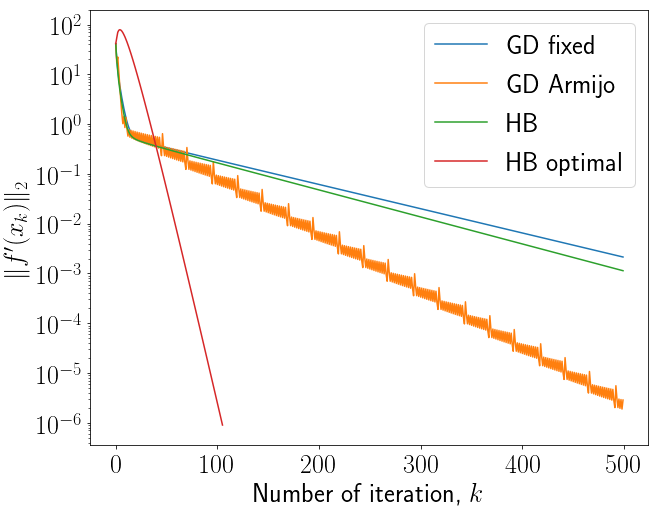

In [137]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("text", usetex=True)

figsize = (10, 8)
fontsize = 26
plt.figure(figsize=figsize)
for m in methods:
    plt.semilogy([np.linalg.norm(grad(x)) for x in methods[m].get_convergence()[:500]], label=m)
plt.legend(fontsize=fontsize)
plt.xlabel("Number of iteration, $k$", fontsize=fontsize)
plt.ylabel(r"$\| f'(x_k)\|_2$", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)

### Heavy-ball method highlights

- Simple two-step method
- Converges much faster than GD with appropriate $\alpha_k$, $\beta_k$
- CG is particular case
- Proof only for $\mu$-strongly convex functions

## Nesterov accelerated methods (Nesterov, 1983)

One of possible notation variant

\begin{equation*}
\begin{split}
& y_0 = x_0 \\
& x_{k+1} = y_k - \alpha_k f'(y_k)\\
& y_{k+1} = x_{k+1} + \frac{k}{k + 3} (x_{k+1} - x_k)
\end{split}
\end{equation*}

- Heavy-ball comparison
- ODE interpretation again
- Non-monotone, too
- For those who likes geometry there exists [geometric descent](https://arxiv.org/pdf/1506.08187.pdf) with the same optimal speed of convergence 

### Remarks

- Citation of the original paper by Y. Nesterov

<img src="nesterov_cite.png" width=600>

- Impression of comunity on this method (from [this paper](https://arxiv.org/pdf/1407.1537.pdf))

<img src="lin_coupling_acc.png" width=600>

### Nesterov method visualization

<img src="nesterov_plot.png" width=600>

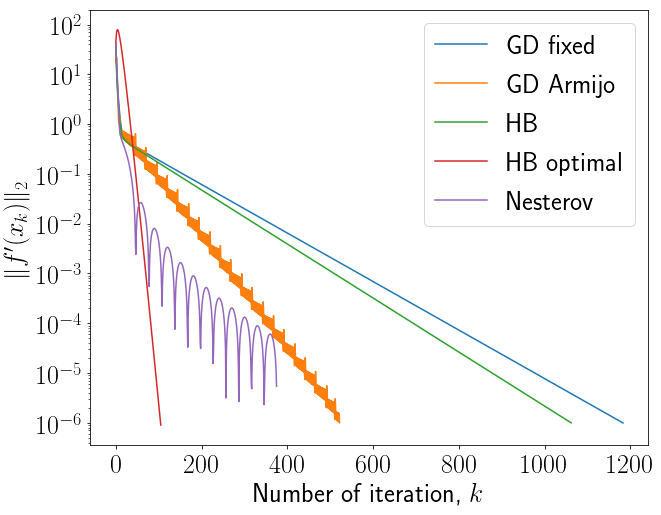

In [144]:
methods["Nesterov"] = fo.AcceleratedGD(f, grad, 
                                       ss.ConstantStepSize(1 / L))
methods["Nesterov"].solve(x0=x0, max_iter=max_iter, tol=tol)
plt.figure(figsize=figsize)
for m in methods:
    plt.semilogy([np.linalg.norm(grad(x)) for x in 
                  methods[m].get_convergence()[:3000]], label=m)
plt.legend(fontsize=fontsize, loc="best")
plt.xlabel("Number of iteration, $k$", fontsize=fontsize)
plt.ylabel(r"$\| f'(x_k)\|_2$", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)

## Non-strongly convex case

In [145]:
n = 50
r = 30
A = np.random.randn(r, n)
A = A.T.dot(A)
x_true = np.random.randn(n)
b = A.dot(x_true)
f = lambda x: 0.5 * x.dot(A.dot(x)) - b.dot(x)
grad = lambda x: A.dot(x) - b
A_eigvals = np.linalg.eigvalsh(A)
L = np.max(A_eigvals)
mu = np.min(A_eigvals)
print(L, mu)

126.25221930089464 -2.3681694196041393e-14


In [152]:
methods = {
    "GD fixed": fo.GradientDescent(f, grad, ss.ConstantStepSize(1 / L)),
#     "GD Armijo": fo.GradientDescent(f, grad, 
#             ss.Backtracking("Armijo", rho=0.5, beta=0.1, init_alpha=1.)),
    "HB": HeavyBall(f, grad, ss.ConstantStepSize(1 / L), beta=0.5),
    "Nesterov": fo.AcceleratedGD(f, grad, ss.ConstantStepSize(1 / L))
}
x0 = np.random.randn(n)
max_iter = 5000
tol = 1e-6

In [153]:
for m in methods:
    _ = methods[m].solve(x0=x0, max_iter=max_iter, tol=tol)

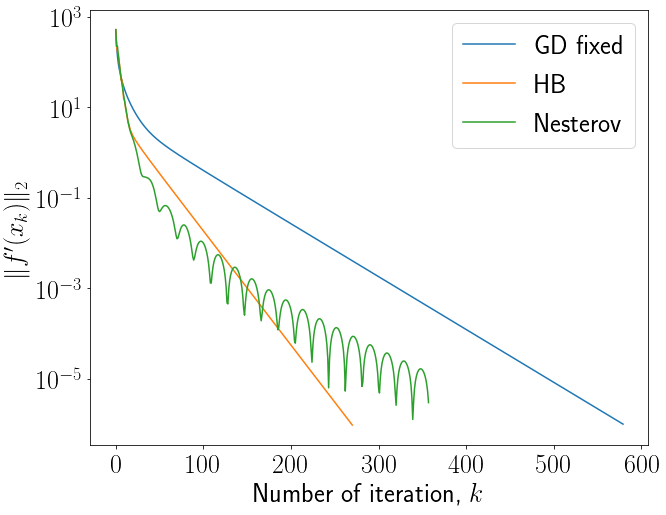

In [154]:
plt.figure(figsize=figsize)
for m in methods:
    plt.semilogy([np.linalg.norm(grad(x)) for x in 
                  methods[m].get_convergence()[:3000]], label=m)
plt.legend(fontsize=fontsize, loc="best")
plt.xlabel("Number of iteration, $k$", fontsize=fontsize)
plt.ylabel(r"$\| f'(x_k)\|_2$", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)

## Nesterov accelerated method hightlights

- Optimal w.r.t. theoretical bounds
- Non-monotone, but [restarts](https://statweb.stanford.edu/~candes/papers/adap_restart_paper.pdf) can be useful
- Parameters tuning can be not so easy ($L$ and $\mu$ are unknown)
- Deep learning applications (see [Chapter 8 in Deep learning book](https://www.deeplearningbook.org/contents/optimization.html))
- Stochastic generalization